In [4]:
!pip install import-ipynb

In [5]:
import import_ipynb
import numpy as np
import pandas as pd

In [6]:
import TemplateML as template
from sklearn.model_selection import train_test_split
pd.options.display.float_format = "{:,.2f}".format

In [42]:
FILE_NAME = "health.csv"
LABEL_COL = "stroke"
healthdf = template.load_data(FILE_NAME)
display(healthdf.head())
print(healthdf.shape)
print(healthdf.dtypes)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,nan,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


(5110, 12)
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [43]:
healthdf.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [44]:
healthdf = template.cleaningup(healthdf, to_numeric=["age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"], cols_to_interpolate=["bmi"], cols_to_delete=["id"])

df is all cleaned up..


In [45]:
print(healthdf.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Shape is:
 (5110, 11)

 Columns are:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 Types are:
 gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

 Statistical Analysis of Numerical Columns:
            age  hypertension  heart_disease  avg_glucose_level      bmi  \
count 5,110.00      5,110.00       5,110.00           5,110.00 5,110.00   
mean     43.23          0.10           0.05             106.15    28.93   
std      22.61          0.30           0.23              45.28     7.78   
min       0.08          0.00           0.00              55.12    10.30 

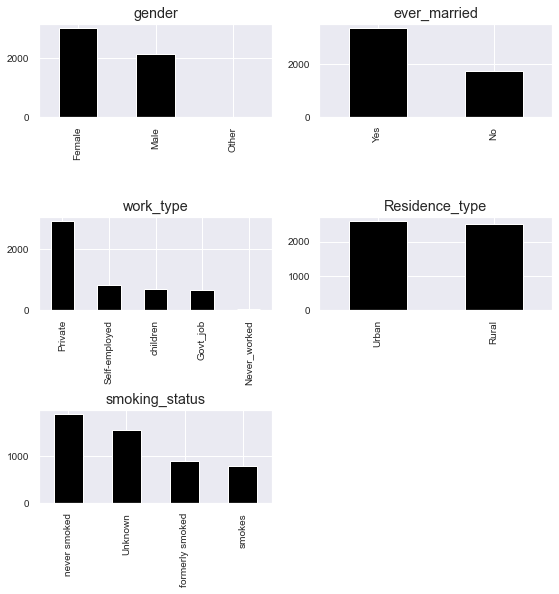

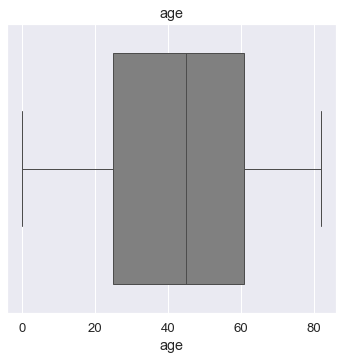

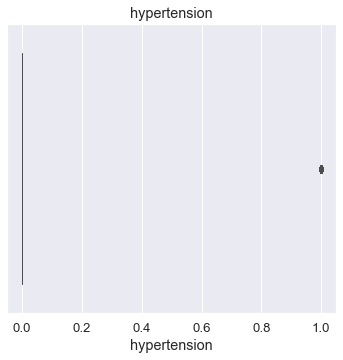

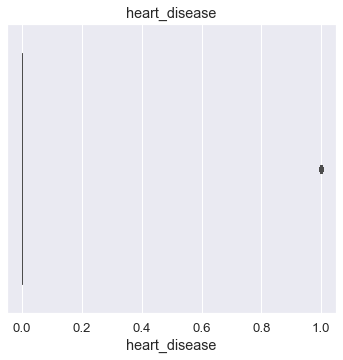

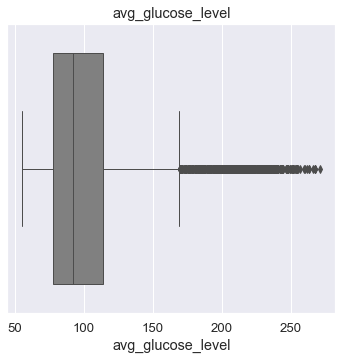

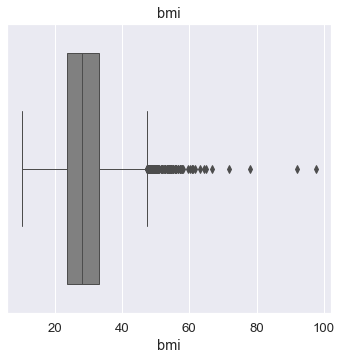

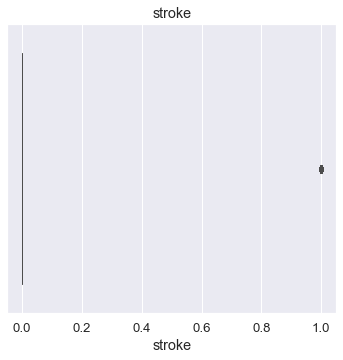

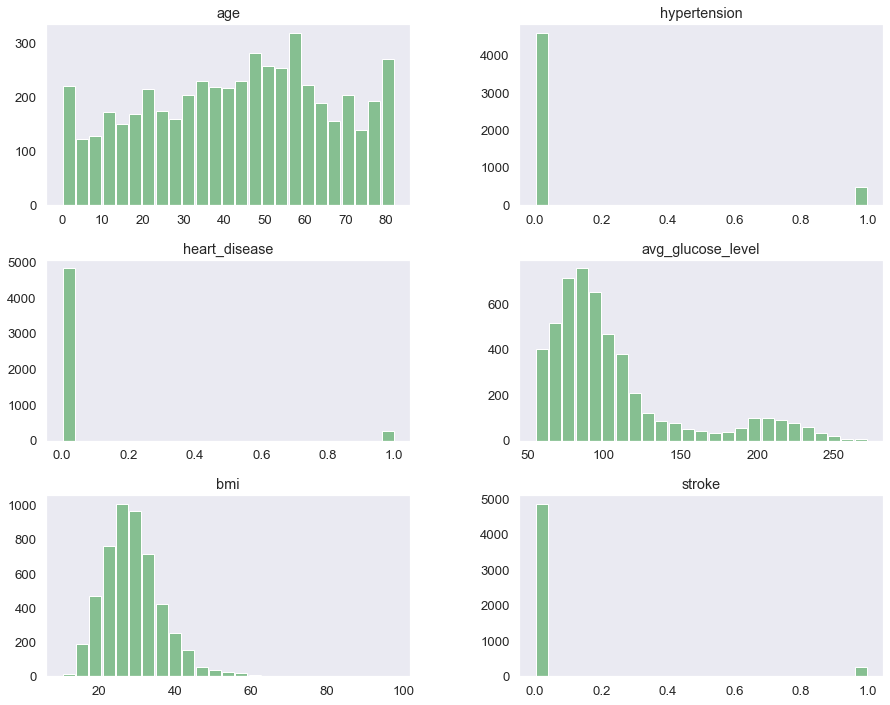

In [46]:
template.basicanalysis(healthdf)
template.stringcolanalysis(healthdf)
template.numcolanalysis(healthdf)

In [36]:
data['stroke'].unique()

array([1, 0], dtype=int64)

#### Statistical Analysis

In [47]:
cat_cols= template.num_cat(healthdf,'Category')
for i in cat_cols:
    print(i)
    template.ANOVA(healthdf,i,'stroke')

work_type
F_onewayResult(statistic=12.398134638161165, pvalue=4.904669760523591e-10)
Reject null hypothesies and conclude that atleast one group is different and the feature is releavant to the class.
gender
F_onewayResult(statistic=0.2361764325989386, pvalue=0.7896499672462672)
Accept null hypothesies and conclude that atleast one group is same and the feature is not releavant to the class.
smoking_status
F_onewayResult(statistic=9.763843746729993, pvalue=2.0223665071082665e-06)
Reject null hypothesies and conclude that atleast one group is different and the feature is releavant to the class.
ever_married
F_onewayResult(statistic=60.667229655920735, pvalue=8.128658950932845e-15)
Reject null hypothesies and conclude that atleast one group is different and the feature is releavant to the class.
Residence_type
F_onewayResult(statistic=1.2208416612473316, pvalue=0.26924758060834464)
Accept null hypothesies and conclude that atleast one group is same and the feature is not releavant to the

Residence Type and Gender are not that relevent for stroke classification

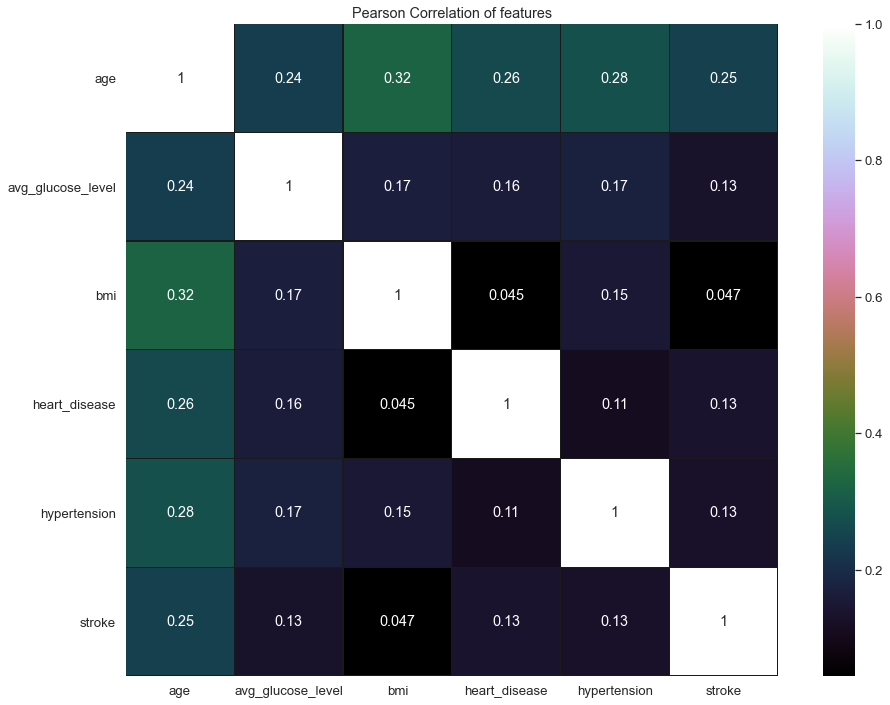

In [49]:
template.corr_heat(healthdf)

#### Investigating some relationnships using scatter plots and barplots

#### Numerical Variables [age,avg_glucose_level,bmi]

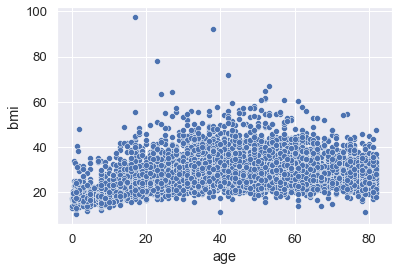

In [56]:
template.scatter_plot(healthdf,'age','bmi')

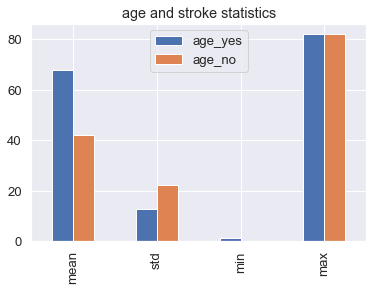

In [76]:
#age and stroke
template.target_num(healthdf,'stroke','age')

Mean age is higher of people having a stroke

In [77]:
num_cols= template.num_cat(healthdf,'Numeric')
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

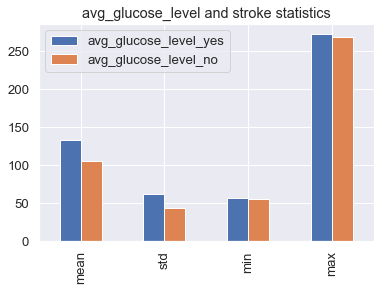

In [78]:
target_num(healthdf,'stroke','avg_glucose_level')

Mean average glucose level is higher of people having a stroke

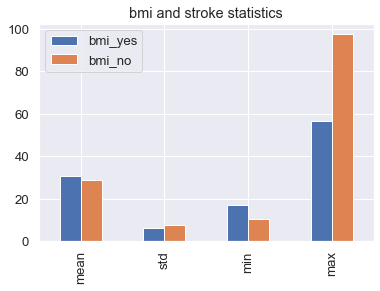

In [80]:
target_num(healthdf,'stroke', 'bmi')

#### Categorical analysis with target variable

In [82]:
cat_cols= template.num_cat(healthdf,'Category')
cat_cols

['work_type', 'gender', 'smoking_status', 'ever_married', 'Residence_type']

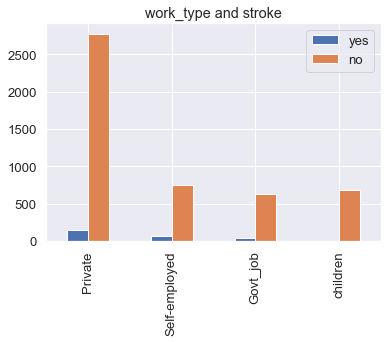

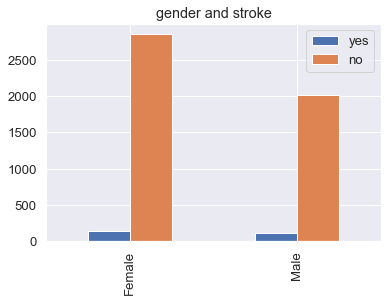

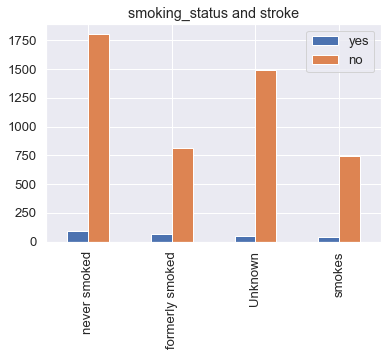

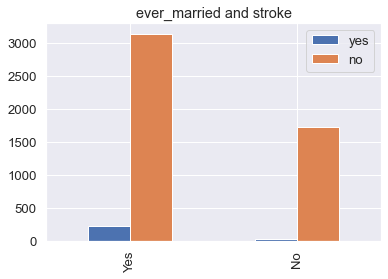

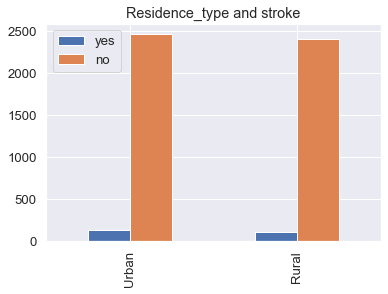

In [93]:
for i in cat_cols:
    template.cat_tar(healthdf,'stroke',i)


In [12]:
healthdf = template.onehotencoding(healthdf)

In [13]:
healthdf.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [14]:
healthdf['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

#### Machine Learning Results without dealing with class imbalnace recall is very less

[[1442    2]
 [  84    5]]
No Skill: ROC AUC=0.500
Nearest Neighbors : ROC AUC=0.649


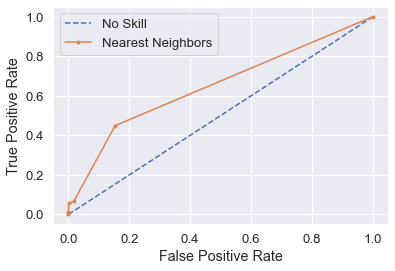

Classification Report Nearest Neighbors
              precision    recall  f1-score   support

           1       0.71      0.06      0.10        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.83      0.53      0.54      1533
weighted avg       0.93      0.94      0.92      1533

Accuracy: 0.943901
Precision: 0.714286
Recall: 0.056180
F1 score: 0.104167
Cohens kappa: 0.096517
ROC_AUC: 0.527397
[[468 976]
 [  0  89]]
No Skill: ROC AUC=0.500
Naive Bayes : ROC AUC=0.816


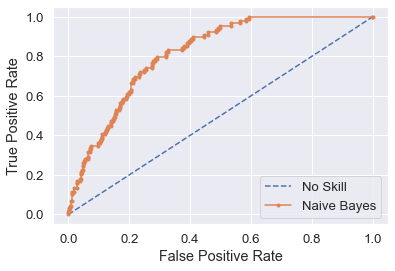

Classification Report Naive Bayes
              precision    recall  f1-score   support

           1       0.08      1.00      0.15        89
           0       1.00      0.32      0.49      1444

    accuracy                           0.36      1533
   macro avg       0.54      0.66      0.32      1533
weighted avg       0.95      0.36      0.47      1533

Accuracy: 0.363340
Precision: 0.083568
Recall: 1.000000
F1 score: 0.154246
Cohens kappa: 0.052740
ROC_AUC: 0.662050
[[1444    0]
 [  89    0]]
No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.840


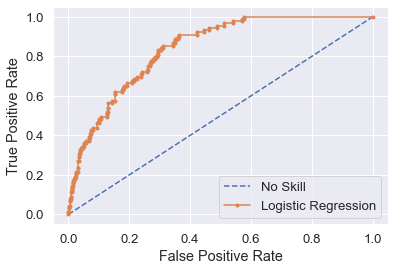

Classification Report Logistic Regression
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy: 0.941944
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
Cohens kappa: 0.000000
ROC_AUC: 0.500000
[[1444    0]
 [  89    0]]
No Skill: ROC AUC=0.500
Neural Net : ROC AUC=0.838


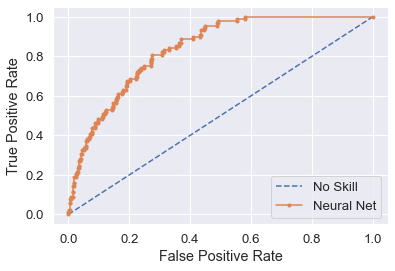

Classification Report Neural Net
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy: 0.941944
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
Cohens kappa: 0.000000
ROC_AUC: 0.500000
[[1444    0]
 [  89    0]]
No Skill: ROC AUC=0.500
Linear SVM : ROC AUC=0.666


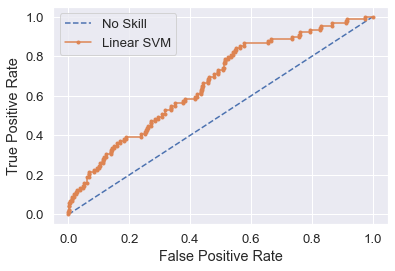

Classification Report Linear SVM
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy: 0.941944
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
Cohens kappa: 0.000000
ROC_AUC: 0.500000
[[1443    1]
 [  88    1]]
No Skill: ROC AUC=0.500
Gradient Boosting Classifier : ROC AUC=0.824


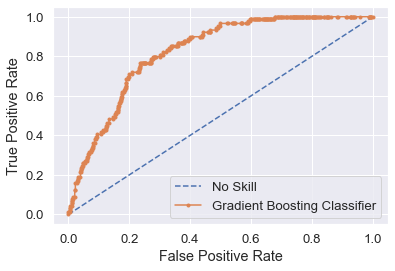

Classification Report Gradient Boosting Classifier
              precision    recall  f1-score   support

           1       0.50      0.01      0.02        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.94      0.92      1533

Accuracy: 0.941944
Precision: 0.500000
Recall: 0.011236
F1 score: 0.021978
Cohens kappa: 0.019476
ROC_AUC: 0.505272
[[1374   70]
 [  74   15]]
No Skill: ROC AUC=0.500
Decision Tree : ROC AUC=0.560


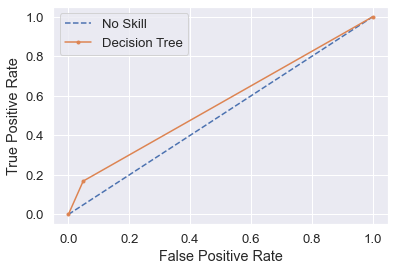

Classification Report Decision Tree
              precision    recall  f1-score   support

           1       0.18      0.17      0.17        89
           0       0.95      0.95      0.95      1444

    accuracy                           0.91      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.90      0.91      0.91      1533

Accuracy: 0.906067
Precision: 0.176471
Recall: 0.168539
F1 score: 0.172414
Cohens kappa: 0.122649
ROC_AUC: 0.560031
[[1438    6]
 [  87    2]]
No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.707


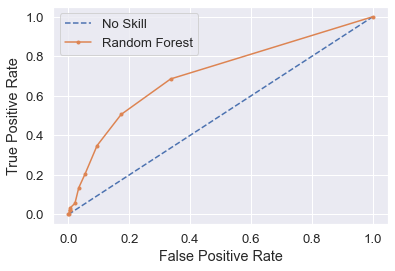

Classification Report Random Forest
              precision    recall  f1-score   support

           1       0.25      0.02      0.04        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.90      0.94      0.91      1533

Accuracy: 0.939335
Precision: 0.250000
Recall: 0.022472
F1 score: 0.041237
Cohens kappa: 0.031967
ROC_AUC: 0.509158
[18:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1434   10]
 [  87    2]]
No Skill: ROC AUC=0.500
XGBoost : ROC AUC=0.785


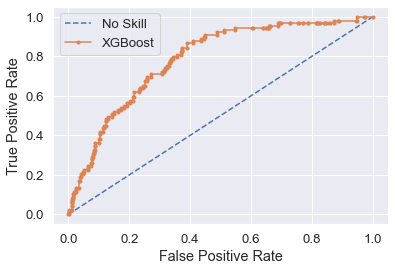

Classification Report XGBoost
              precision    recall  f1-score   support

           1       0.17      0.02      0.04        89
           0       0.94      0.99      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.55      0.51      0.50      1533
weighted avg       0.90      0.94      0.91      1533

Accuracy: 0.936725
Precision: 0.166667
Recall: 0.022472
F1 score: 0.039604
Cohens kappa: 0.026169
ROC_AUC: 0.507773
[[1439    5]
 [  88    1]]
No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.813


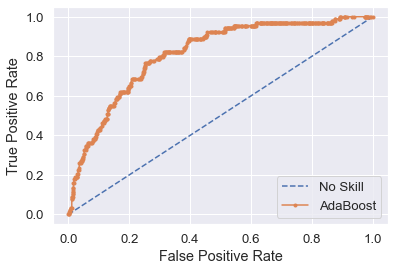

Classification Report AdaBoost
              precision    recall  f1-score   support

           1       0.17      0.01      0.02        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.55      0.50      0.49      1533
weighted avg       0.90      0.94      0.91      1533

Accuracy: 0.939335
Precision: 0.166667
Recall: 0.011236
F1 score: 0.021053
Cohens kappa: 0.013821
ROC_AUC: 0.503887
[[1439    5]
 [  86    3]]
No Skill: ROC AUC=0.500
Light GBM : ROC AUC=0.801


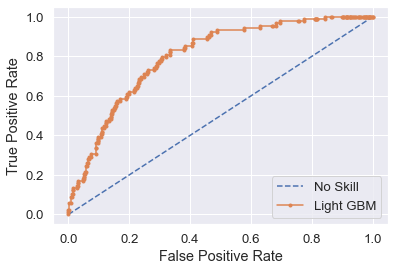

Classification Report Light GBM
              precision    recall  f1-score   support

           1       0.38      0.03      0.06        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.66      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533

Accuracy: 0.940639
Precision: 0.375000
Recall: 0.033708
F1 score: 0.061856
Cohens kappa: 0.052785
ROC_AUC: 0.515123


,classifier,train_score,test_score,precision,recall,f1_score,cohens_kappa,roc_auc
0,Nearest Neighbors,0.96,0.94,0.71,0.06,0.10,0.10,0.53
1,Naive Bayes,0.35,0.36,0.08,1.00,0.15,0.05,0.66
2,Logistic Regression,0.96,0.94,0.00,0.00,0.00,0.00,0.50
3,Neural Net,0.96,0.94,0.00,0.00,0.00,0.00,0.50
4,Linear SVM,0.96,0.94,0.00,0.00,0.00,0.00,0.50
5,Gradient Boosting Classifier,0.96,0.94,0.50,0.01,0.02,0.02,0.51
6,Decision Tree,1.00,0.91,0.18,0.17,0.17,0.12,0.56
7,Random Forest,0.99,0.94,0.25,0.02,0.04,0.03,0.51
8,XGBoost,1.00,0.94,0.17,0.02,0.04,0.03,0.51
9,AdaBoost,0.96,0.94,0.17,0.01,0.02,0.01,0.50


In [15]:
X_train, X_test, y_train, y_test=template.test_train(healthdf,'stroke')
template.batch_classify(X_train,X_test,y_test,y_train, verbose=True)

#### Without Smote

In [16]:
t1=template.df_wcv_wfs(healthdf,'stroke')
t2=template. df_RFFS_CV(healthdf,'stroke')
t3=template.df_rffs(healthdf,'stroke')


============ LogReg ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.71624266144813

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[968   0]
 [ 54   0]]

============ KNN ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 93.63992172211351

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.4943181818181818

 F-Score:
 0.0

 Confusion Matrix: 
 [[957  11]
 [ 54   0]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.42270058708415

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.4984504132231405

 F-Score:
 0.0

 Confusion Matrix: 
 [[965   3]
 [ 54   0]]

============ AdaBoost ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.32485322896281

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.49793388429752067

 F-

In [19]:
t4=template.df_cv(healthdf,'stroke')

[18:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [17]:
t1

,accuracy,precision,recall,auc_val,f_score,model_obj
Results without CV and FS,,,,,,
LogReg,94.72,0.00,0.00,0.50,0.00,LogisticRegression()
KNN,93.64,0.00,0.00,0.49,0.00,KNeighborsClassifier()
GadientBoosting,94.32,0.00,0.00,0.50,0.00,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,94.32,0.00,0.00,0.50,0.00,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,94.72,0.00,0.00,0.50,0.00,SVC()
DecisionTree,90.70,16.39,18.52,0.57,0.17,DecisionTreeClassifier()
RandomForest,94.62,0.00,0.00,0.50,0.00,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,40.31,7.88,96.30,0.67,0.15,GaussianNB()
MultiLayerPerceptron,94.72,0.00,0.00,0.50,0.00,MLPClassifier(hidden_layer_sizes=5)


In [18]:
t2

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with FS and CV,,,,,,
LogReg,95.13,0.00,0.00,0.50,0.00,LogisticRegression()
KNN,94.34,8.43,2.40,0.51,0.04,KNeighborsClassifier()
GadientBoosting,94.87,0.00,0.00,0.50,0.00,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,95.03,3.33,0.42,0.50,0.01,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,95.13,0.00,0.00,0.50,0.00,SVC()
DecisionTree,91.37,12.87,13.63,0.54,0.13,DecisionTreeClassifier()
RandomForest,94.68,6.67,0.80,0.50,0.01,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,92.11,18.04,17.28,0.57,0.17,GaussianNB()
MultiLayerPerceptron,95.13,0.00,0.00,0.50,0.00,MLPClassifier(hidden_layer_sizes=5)


In [17]:
t3

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with FS,,,,,,
LogReg,94.72,0.00,0.00,0.50,0.00,LogisticRegression()
KNN,93.64,7.69,1.85,0.50,0.03,KNeighborsClassifier()
GadientBoosting,94.23,0.00,0.00,0.50,0.00,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,94.62,0.00,0.00,0.50,0.00,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,94.72,0.00,0.00,0.50,0.00,SVC()
DecisionTree,89.82,9.68,11.11,0.53,0.10,DecisionTreeClassifier()
RandomForest,93.84,9.09,1.85,0.50,0.03,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,90.31,17.39,22.22,0.58,0.20,GaussianNB()
MultiLayerPerceptron,94.72,0.00,0.00,0.50,0.00,MLPClassifier(hidden_layer_sizes=5)


In [20]:
t4

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with CV,,,,,,
LogReg,95.11,0.00,0.00,0.50,0.00,LogisticRegression()
KNN,94.31,7.39,2.40,0.51,0.03,KNeighborsClassifier()
GadientBoosting,94.85,15.00,0.80,0.50,0.02,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,95.01,16.67,1.60,0.51,0.03,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,95.13,0.00,0.00,0.50,0.00,SVC()
DecisionTree,90.33,12.61,16.50,0.55,0.14,DecisionTreeClassifier()
RandomForest,95.01,30.00,1.20,0.51,0.02,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,41.82,7.39,94.38,0.67,0.14,GaussianNB()
MultiLayerPerceptron,95.13,10.00,0.40,0.50,0.01,MLPClassifier(hidden_layer_sizes=5)


#### With Smote

In [21]:
data=template.sm_sample(healthdf,'stroke')

Shape of X before SMOTE: (6805, 21)
    Shape of X after SMOTE: (9722, 21)

Balance of positive and negative classes (%):
stroke
1        50.00
0        50.00
dtype: float64


In [22]:
df,df1,df2,df3,df4,df5,df6,df7=template.all_combinations(data,'stroke')

============ LogReg ===========
Prediction Vector: 
 [1 1 0 ... 0 1 1]

 Accuracy: 
 81.23393316195373

 Precision of event Happening: 
 76.60194174757281

 Recall of event Happening: 
 86.4184008762322

 AUC: 
 0.8153284384896882

 F-Score:
 0.8121461657231086

 Confusion Matrix: 
 [[791 241]
 [124 789]]

============ KNN ===========
Prediction Vector: 
 [1 1 0 ... 0 0 0]

 Accuracy: 
 90.17994858611826

 Precision of event Happening: 
 84.12098298676749

 Recall of event Happening: 
 97.48083242059145

 AUC: 
 0.9060088132657479

 F-Score:
 0.9030948756976154

 Confusion Matrix: 
 [[864 168]
 [ 23 890]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 1 0 ... 0 1 1]

 Accuracy: 
 88.12339331619538

 Precision of event Happening: 
 83.89662027833002

 Recall of event Happening: 
 92.44249726177436

 AUC: 
 0.8837241142158485

 F-Score:
 0.8796248045857218

 Confusion Matrix: 
 [[870 162]
 [ 69 844]]

============ AdaBoost ===========
Prediction Vector: 
 [1 1 0 ... 0 

In [24]:
df

,accuracy,precision,recall,auc_val,f_score,model_obj
Results without CV and FS,,,,,,
LogReg,81.23,76.60,86.42,0.82,0.81,LogisticRegression()
KNN,90.18,84.12,97.48,0.91,0.90,KNeighborsClassifier()
GadientBoosting,88.12,83.90,92.44,0.88,0.88,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,85.09,79.92,91.13,0.85,0.85,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,85.71,79.87,92.99,0.86,0.86,SVC()
DecisionTree,88.69,86.36,90.14,0.89,0.88,DecisionTreeClassifier()
RandomForest,94.60,92.00,96.93,0.95,0.94,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,61.44,54.92,99.67,0.64,0.71,GaussianNB()
MultiLayerPerceptron,81.54,76.79,86.97,0.82,0.82,MLPClassifier(hidden_layer_sizes=5)


In [23]:
df1

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with CV,,,,,,
LogReg,79.27,76.58,84.41,0.79,0.80,LogisticRegression()
KNN,90.58,85.81,97.26,0.91,0.91,KNeighborsClassifier()
GadientBoosting,87.49,85.25,90.62,0.87,0.88,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,83.93,81.06,88.52,0.84,0.85,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,85.58,81.24,92.55,0.86,0.87,SVC()
DecisionTree,89.90,89.12,90.91,0.90,0.90,DecisionTreeClassifier()
RandomForest,94.90,93.31,96.75,0.95,0.95,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,62.55,57.23,99.51,0.63,0.73,GaussianNB()
MultiLayerPerceptron,80.88,77.70,86.69,0.81,0.82,MLPClassifier(hidden_layer_sizes=5)


In [25]:
df2

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with FS,,,,,,
LogReg,80.46,75.80,85.76,0.81,0.80,LogisticRegression()
KNN,83.75,78.03,91.02,0.84,0.84,KNeighborsClassifier()
GadientBoosting,85.71,80.98,90.91,0.86,0.86,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,82.62,77.30,89.16,0.83,0.83,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,82.26,75.82,91.35,0.83,0.83,SVC()
DecisionTree,88.95,87.45,89.27,0.89,0.88,DecisionTreeClassifier()
RandomForest,89.10,86.17,91.46,0.89,0.89,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,77.17,70.55,88.17,0.78,0.78,GaussianNB()
MultiLayerPerceptron,81.54,76.89,86.75,0.82,0.82,MLPClassifier(hidden_layer_sizes=5)


In [26]:
df3

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with FS and CV,,,,,,
LogReg,79.07,76.31,84.35,0.79,0.80,LogisticRegression()
KNN,84.58,80.77,90.78,0.85,0.85,KNeighborsClassifier()
GadientBoosting,85.23,82.65,89.14,0.85,0.86,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,82.13,78.70,88.07,0.82,0.83,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,80.99,76.28,89.98,0.81,0.83,SVC()
DecisionTree,89.82,90.19,89.35,0.90,0.90,DecisionTreeClassifier()
RandomForest,89.65,87.74,92.19,0.90,0.90,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,77.01,72.47,87.16,0.77,0.79,GaussianNB()
MultiLayerPerceptron,79.97,76.64,86.28,0.80,0.81,MLPClassifier(hidden_layer_sizes=5)


In [27]:
df4

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with RFE,,,,,,
LogReg,81.44,76.74,86.75,0.82,0.81,LogisticRegression()
KNN,88.89,83.48,95.18,0.89,0.89,KNeighborsClassifier()
GadientBoosting,87.81,83.87,91.68,0.88,0.88,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,84.06,79.30,89.38,0.84,0.84,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,84.42,79.10,90.80,0.85,0.85,SVC()
DecisionTree,87.35,84.49,89.49,0.87,0.87,DecisionTreeClassifier()
RandomForest,91.47,87.92,94.85,0.92,0.91,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,75.94,69.40,87.19,0.77,0.77,GaussianNB()
MultiLayerPerceptron,82.67,76.87,90.25,0.83,0.83,MLPClassifier(hidden_layer_sizes=5)


In [28]:
df5

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with RFE and CV,,,,,,
LogReg,79.26,76.57,84.39,0.79,0.80,LogisticRegression()
KNN,90.58,85.81,97.26,0.91,0.91,KNeighborsClassifier()
GadientBoosting,87.49,85.25,90.62,0.87,0.88,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,83.93,81.06,88.52,0.84,0.85,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,85.77,81.43,92.72,0.86,0.87,SVC()
DecisionTree,89.94,89.04,91.12,0.90,0.90,DecisionTreeClassifier()
RandomForest,94.88,93.34,96.65,0.95,0.95,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,73.05,66.89,91.34,0.73,0.77,GaussianNB()
MultiLayerPerceptron,80.22,77.19,85.89,0.80,0.81,MLPClassifier(hidden_layer_sizes=5)


In [29]:
df6

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with PCA,,,,,,
LogReg,69.00,66.40,76.85,0.69,0.71,LogisticRegression()
KNN,87.20,82.19,94.96,0.87,0.88,KNeighborsClassifier()
GadientBoosting,81.08,77.06,88.48,0.81,0.82,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,75.32,73.43,79.32,0.75,0.76,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,75.68,71.83,84.47,0.76,0.78,SVC()
DecisionTree,86.63,84.70,89.40,0.87,0.87,DecisionTreeClassifier()
RandomForest,89.56,85.44,95.37,0.90,0.90,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,67.92,62.15,91.56,0.68,0.74,GaussianNB()
MultiLayerPerceptron,72.70,69.33,81.38,0.73,0.75,MLPClassifier(hidden_layer_sizes=5)


In [30]:
df7

,accuracy,precision,recall,auc_val,f_score,model_obj
Results with PCA and CV,,,,,,
LogReg,68.52,65.71,77.58,0.69,0.71,LogisticRegression()
KNN,87.44,82.79,94.57,0.87,0.88,KNeighborsClassifier()
GadientBoosting,79.61,75.89,86.85,0.80,0.81,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost,74.86,72.93,79.14,0.75,0.76,"(DecisionTreeClassifier(max_depth=1, random_st..."
SVM,76.36,71.89,86.63,0.76,0.79,SVC()
DecisionTree,86.20,85.32,87.47,0.86,0.86,DecisionTreeClassifier()
RandomForest,90.41,87.49,94.34,0.90,0.91,"(DecisionTreeClassifier(max_features='auto', r..."
NaiveBayes,66.78,61.24,91.44,0.67,0.73,GaussianNB()
MultiLayerPerceptron,72.44,69.03,81.42,0.72,0.75,MLPClassifier(hidden_layer_sizes=5)


#### Hyperparametre Tuning

In [ ]:
template.best_params_RF(data,'stroke')

#### Training on best parametres

In [32]:
X_train, X_test, y_train, y_test=template.test_train(data,'stroke')

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000,max_features = 'sqrt')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

template.validationmetrics(clf, X_test, y_test, verbose=True)

Prediction Vector: 
 [0 1 0 ... 0 0 1]

 Accuracy: 
 94.24065821049022

 Precision of event Happening: 
 92.27748691099477

 Recall of event Happening: 
 96.57534246575342

 AUC: 
 0.9423825462340519

 F-Score:
 0.9437751004016064

 Confusion Matrix: 
 [[1339  118]
 [  50 1410]]


{'accuracy': 94.24065821049022,
 'precision': 92.27748691099477,
 'recall': 96.57534246575342,
 'auc_val': 0.9423825462340519,
 'f_score': 0.9437751004016064,
 'model_obj': RandomForestClassifier(max_features='sqrt', n_estimators=1000)}

[[1177  280]
 [  54 1406]]
No Skill: ROC AUC=0.500
Nearest Neighbors : ROC AUC=0.953


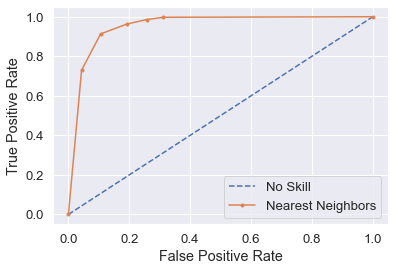

Classification Report Nearest Neighbors
              precision    recall  f1-score   support

           1       0.83      0.96      0.89      1460
           0       0.96      0.81      0.88      1457

    accuracy                           0.89      2917
   macro avg       0.90      0.89      0.88      2917
weighted avg       0.89      0.89      0.88      2917

Accuracy: 0.885499
Precision: 0.833926
Recall: 0.963014
F1 score: 0.893833
Cohens kappa: 0.770961
ROC_AUC: 0.885419
[[ 385 1072]
 [  11 1449]]
No Skill: ROC AUC=0.500
Naive Bayes : ROC AUC=0.806


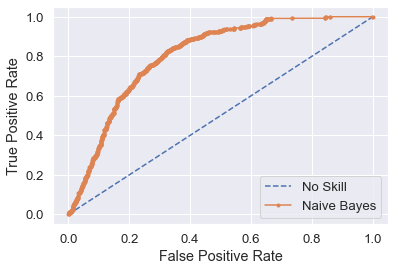

Classification Report Naive Bayes
              precision    recall  f1-score   support

           1       0.57      0.99      0.73      1460
           0       0.97      0.26      0.42      1457

    accuracy                           0.63      2917
   macro avg       0.77      0.63      0.57      2917
weighted avg       0.77      0.63      0.57      2917

Accuracy: 0.628728
Precision: 0.574772
Recall: 0.992466
F1 score: 0.727958
Cohens kappa: 0.256900
ROC_AUC: 0.628354
[[1084  373]
 [ 225 1235]]
No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.855


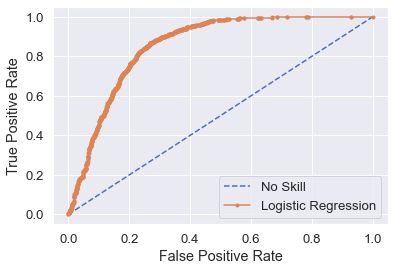

Classification Report Logistic Regression
              precision    recall  f1-score   support

           1       0.77      0.85      0.81      1460
           0       0.83      0.74      0.78      1457

    accuracy                           0.79      2917
   macro avg       0.80      0.79      0.79      2917
weighted avg       0.80      0.79      0.79      2917

Accuracy: 0.794995
Precision: 0.768035
Recall: 0.845890
F1 score: 0.805085
Cohens kappa: 0.589946
ROC_AUC: 0.794942
[[1103  354]
 [ 246 1214]]
No Skill: ROC AUC=0.500
Neural Net : ROC AUC=0.858


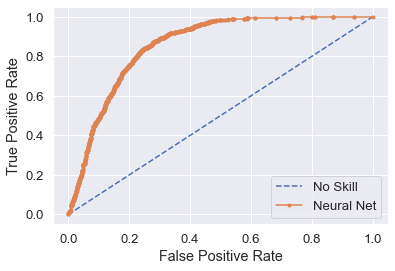

Classification Report Neural Net
              precision    recall  f1-score   support

           1       0.77      0.83      0.80      1460
           0       0.82      0.76      0.79      1457

    accuracy                           0.79      2917
   macro avg       0.80      0.79      0.79      2917
weighted avg       0.80      0.79      0.79      2917

Accuracy: 0.794309
Precision: 0.774235
Recall: 0.831507
F1 score: 0.801849
Cohens kappa: 0.588587
ROC_AUC: 0.794271
[[1129  328]
 [ 117 1343]]
No Skill: ROC AUC=0.500
Linear SVM : ROC AUC=0.925


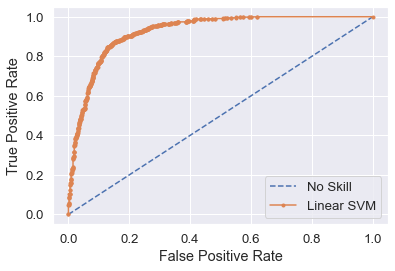

Classification Report Linear SVM
              precision    recall  f1-score   support

           1       0.80      0.92      0.86      1460
           0       0.91      0.77      0.84      1457

    accuracy                           0.85      2917
   macro avg       0.85      0.85      0.85      2917
weighted avg       0.85      0.85      0.85      2917

Accuracy: 0.847446
Precision: 0.803710
Recall: 0.919863
F1 score: 0.857873
Cohens kappa: 0.694846
ROC_AUC: 0.847371
[[1230  227]
 [ 138 1322]]
No Skill: ROC AUC=0.500
Gradient Boosting Classifier : ROC AUC=0.956


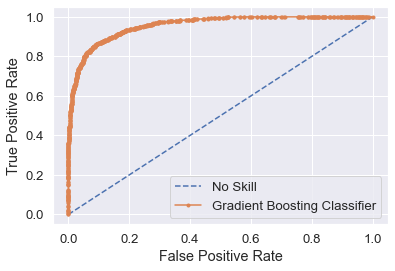

Classification Report Gradient Boosting Classifier
              precision    recall  f1-score   support

           1       0.85      0.91      0.88      1460
           0       0.90      0.84      0.87      1457

    accuracy                           0.87      2917
   macro avg       0.88      0.87      0.87      2917
weighted avg       0.88      0.87      0.87      2917

Accuracy: 0.874871
Precision: 0.853454
Recall: 0.905479
F1 score: 0.878697
Cohens kappa: 0.749727
ROC_AUC: 0.874840
[[1313  144]
 [ 158 1302]]
No Skill: ROC AUC=0.500
Decision Tree : ROC AUC=0.896


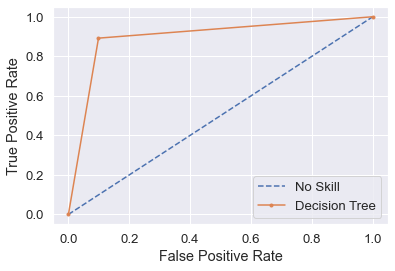

Classification Report Decision Tree
              precision    recall  f1-score   support

           1       0.90      0.89      0.90      1460
           0       0.89      0.90      0.90      1457

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917

Accuracy: 0.896469
Precision: 0.900415
Recall: 0.891781
F1 score: 0.896077
Cohens kappa: 0.792940
ROC_AUC: 0.896474
[[1348  109]
 [  76 1384]]
No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.983


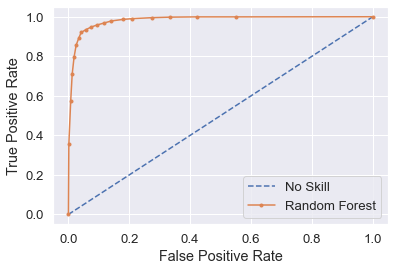

Classification Report Random Forest
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1460
           0       0.95      0.93      0.94      1457

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917

Accuracy: 0.936579
Precision: 0.926993
Recall: 0.947945
F1 score: 0.937352
Cohens kappa: 0.873154
ROC_AUC: 0.936567
[20:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1410   47]
 [  81 1379]]
No Skill: ROC AUC=0.500
XGBoost : ROC AUC=0.991


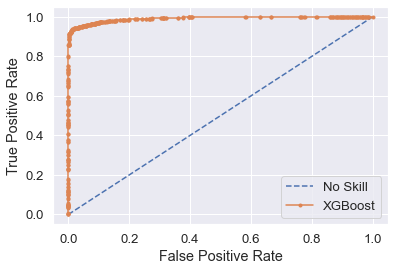

Classification Report XGBoost
              precision    recall  f1-score   support

           1       0.97      0.94      0.96      1460
           0       0.95      0.97      0.96      1457

    accuracy                           0.96      2917
   macro avg       0.96      0.96      0.96      2917
weighted avg       0.96      0.96      0.96      2917

Accuracy: 0.956119
Precision: 0.967041
Recall: 0.944521
F1 score: 0.955648
Cohens kappa: 0.912241
ROC_AUC: 0.956131
[[1125  332]
 [ 149 1311]]
No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.919


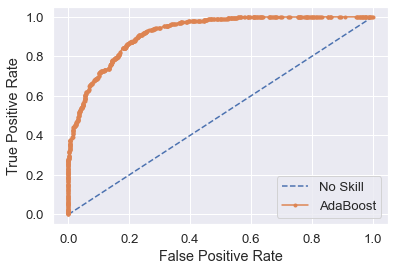

Classification Report AdaBoost
              precision    recall  f1-score   support

           1       0.80      0.90      0.84      1460
           0       0.88      0.77      0.82      1457

    accuracy                           0.84      2917
   macro avg       0.84      0.84      0.83      2917
weighted avg       0.84      0.84      0.83      2917

Accuracy: 0.835105
Precision: 0.797931
Recall: 0.897945
F1 score: 0.844989
Cohens kappa: 0.670166
ROC_AUC: 0.835040
[[1416   41]
 [  91 1369]]
No Skill: ROC AUC=0.500
Light GBM : ROC AUC=0.989


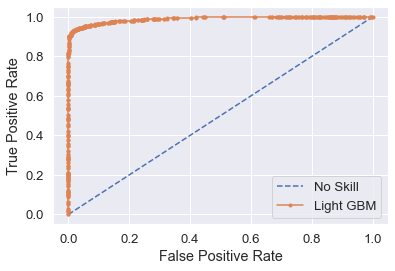

Classification Report Light GBM
              precision    recall  f1-score   support

           1       0.97      0.94      0.95      1460
           0       0.94      0.97      0.96      1457

    accuracy                           0.95      2917
   macro avg       0.96      0.95      0.95      2917
weighted avg       0.96      0.95      0.95      2917

Accuracy: 0.954748
Precision: 0.970922
Recall: 0.937671
F1 score: 0.954007
Cohens kappa: 0.909499
ROC_AUC: 0.954766


,classifier,train_score,test_score,precision,recall,f1_score,cohens_kappa,roc_auc
0,Nearest Neighbors,0.92,0.89,0.83,0.96,0.89,0.77,0.89
1,Naive Bayes,0.62,0.63,0.57,0.99,0.73,0.26,0.63
2,Logistic Regression,0.79,0.79,0.77,0.85,0.81,0.59,0.79
3,Neural Net,0.80,0.79,0.77,0.83,0.80,0.59,0.79
4,Linear SVM,0.86,0.85,0.80,0.92,0.86,0.69,0.85
5,Gradient Boosting Classifier,0.89,0.87,0.85,0.91,0.88,0.75,0.87
6,Decision Tree,1.00,0.90,0.90,0.89,0.90,0.79,0.90
7,Random Forest,1.00,0.94,0.93,0.95,0.94,0.87,0.94
8,XGBoost,1.00,0.96,0.97,0.94,0.96,0.91,0.96
9,AdaBoost,0.84,0.84,0.80,0.90,0.84,0.67,0.84


In [34]:
template.batch_classify(X_train,X_test,y_test,y_train, verbose=True)